# Project : Case Study



### Solution - 1 :
#### Task : To find out perfect Location for my Friend, among Bangalore, Mumbai, New Delhi, Gurgaon, Noida, to have a high chance of getting investment to start his/her startup

Following are Locations with Number of fundings - 
Bangalore -- 637
Mumbai -- 449
New Delhi -- 389
Gurgaon -- 241
Noida -- 79
Bangalore is the Perfect Location with 637 fundings


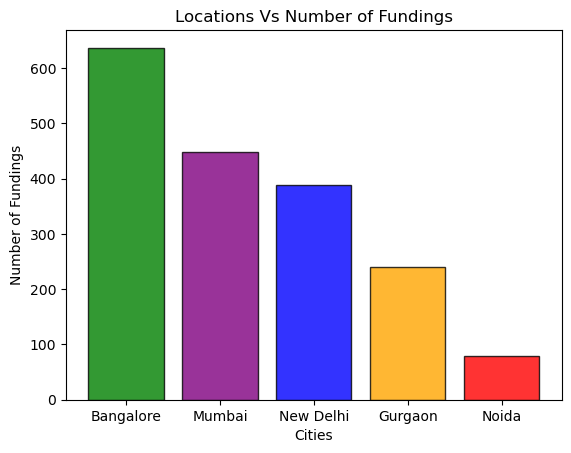

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()

df.drop(df.index[df.CityLocation.isnull()], inplace=True)

### Functions ###

def getINCity(city):
    n = city.split('/')
    for i in n:
        i = i.strip()
        if i in citynames:
            dct[i] = dct.get(i, 0) + 1

###############

citynames = ['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida'] 
df.replace({'CityLocation': {'Delhi':'New Delhi', 'bangalore':'Bangalore'}}, inplace=True)

dct = {}
df['CityLocation'] = df['CityLocation'].apply(getINCity)

cities = np.array(list(dct.keys()))
count = np.array(list(dct.values()))

ind = count.argmax()
best_city = cities[ind]
best_funding = count[ind]

print('Following are Locations with Number of fundings - ')
for i in dct:
    print(i, "--", dct[i])

print(best_city, "is the Perfect Location with", best_funding, "fundings")

color=['green', 'purple', 'blue', 'orange', 'red']
plt.bar(cities, count, color=color, alpha=0.8, edgecolor='black')
plt.title('Locations Vs Number of Fundings')
plt.xlabel('Cities')
plt.ylabel('Number of Fundings')
plt.show()

### Solution - 2
#### Task: To find the list of Top 5 Investors who probably can invest in my friend’s startup to increase the chance of my friend's startup to get some initial investment by contacting these Investors

Top 5 Investors with Investment Rounds are: 
Sequoia Capital -- 64
Accel Partners -- 53
Kalaari Capital -- 44
SAIF Partners -- 41
Indian Angel Network -- 40


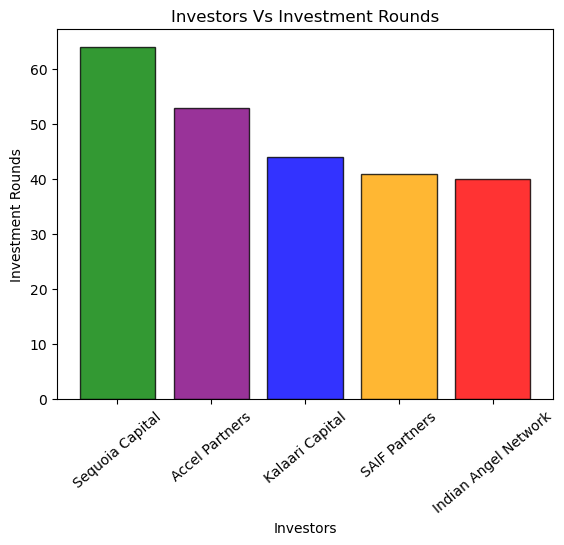

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()

df.drop(df.index[df.InvestorsName.isnull()], inplace=True)
df.drop(df.index[df.InvestorsName == 'Undisclosed investors'], inplace=True)
df.drop(df.index[df.InvestorsName == 'Undisclosed Investors'], inplace=True)

investors = {}

##Functions####

def getInvestor(name):
    i = name.split(',')
    for n in i:
        n = n.strip()
        investors[n] = investors.get(n, 0)+1
    return

################

df.InvestorsName.apply(getInvestor)

investor_name = np.array(list(investors.keys()))
investor_num = np.array(list(investors.values()))

ind = investor_num.argsort()[::-1]
ind = ind[:5]

investor_num = investor_num[ind]
investor_name = investor_name[ind]

print("Top 5 Investors with Investment Rounds are: ")
for i in range(len(investor_name)):
    print(investor_name[i], "--", investor_num[i])
    
color=['green', 'purple', 'blue', 'orange', 'red']
plt.bar(investor_name, investor_num, color=color, alpha=0.8, edgecolor='black')
plt.title('Investors Vs Investment Rounds')
plt.xticks(rotation = 40)
plt.xlabel('Investors')
plt.ylabel('Investment Rounds')
plt.show()

### Solution - 3
#### Task: To Refine the above List and Find those top 5 investors who have invested maximum number of times in different companies

Top 5 Investors are : 
Sequoia Capital -- 48
Accel Partners -- 47
Kalaari Capital -- 41
Indian Angel Network -- 40
Blume Ventures -- 36


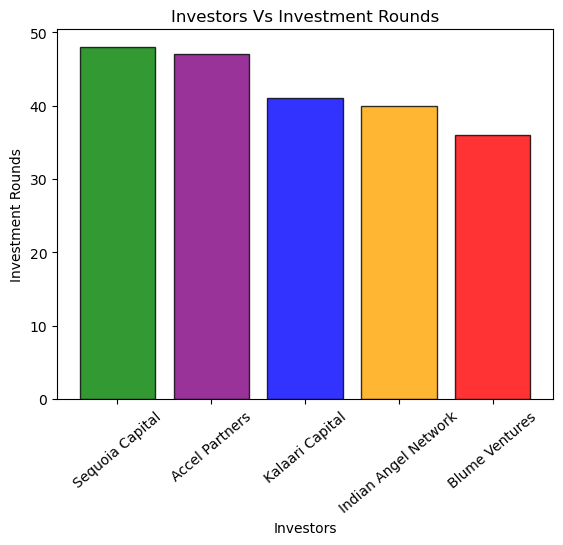

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()

df.dropna(subset=['InvestorsName', 'StartupName'], inplace=True)
df.drop(df.index[df.InvestorsName == 'Undisclosed investors'], inplace=True)
df.drop(df.index[df.InvestorsName == 'Undisclosed Investors'], inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

startups = list(df.StartupName)
investor_name = list(df.InvestorsName)

dct = {}

for i in range(len(investor_name)):
    name = investor_name[i].split(',')
    for n in name:
        if n != '':
            n = n.strip()
            if n in dct:
                dct[n].add(startups[i])
            else:
                dct[n] = {startups[i]}
            
for i in dct:
    dct[i] = len(dct[i])
    
investor_name = np.array(list(dct.keys()))
investor_num = np.array(list(dct.values()))

ind = investor_num.argsort()[::-1]
ind = ind[:5]

investor_num = investor_num[ind]
investor_name = investor_name[ind]

print("Top 5 Investors are : ")
for i in range(len(investor_name)):
    print(investor_name[i], "--", investor_num[i])

color=['green', 'purple', 'blue', 'orange', 'red']
plt.bar(investor_name, investor_num, color=color, alpha=0.8, edgecolor='black')
plt.title('Investors Vs Investment Rounds')
plt.xticks(rotation = 40)
plt.xlabel('Investors')
plt.ylabel('Investment Rounds')
plt.show()

### Solution - 4
#### Task: To find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding

Top 5 Investors of Seed or Crowd Funding are - 
Indian Angel Network -- 33
Rajan Anandan -- 23
LetsVenture -- 16
Anupam Mittal -- 16
Group of Angel Investors -- 14


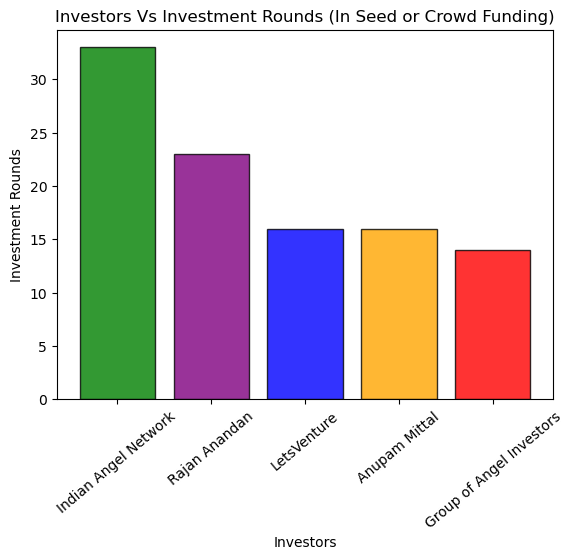

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()

df.replace({'InvestmentType':{'PrivateEquity':'Private Equity', 'SeedFunding':'Seed Funding', 'Crowd funding':'Crowd Funding'}}, inplace=True)
df.dropna(subset=['InvestorsName', 'StartupName'], inplace=True)
df.drop(df.index[df.InvestorsName == 'Undisclosed investors'], inplace=True)
df.drop(df.index[df.InvestorsName == 'Undisclosed Investors'], inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

investor_name = np.array(list(df.InvestorsName))
startups = np.array(list(df.StartupName))
in_type = np.array(list(df.InvestmentType))

ind = np.where((in_type == 'Seed Funding') | (in_type == 'Crowd Funding'))
startups = startups[ind]
investor_name = investor_name[ind]

dct = {}
for i in range(len(investor_name)):
    n = investor_name[i].split(',')
    for inv in n:
        if inv != '':
            inv = inv.strip()
            if inv in dct:
                dct[inv].add(startups[i])
            else:
                dct[inv] = {startups[i]}

for i in dct:
    dct[i] = len(dct[i])

investor_name = np.array(list(dct.keys()))
startups = np.array(list(dct.values()))

ind = startups.argsort()[::-1]
ind = ind[:5]

investor_name = investor_name[ind]
startups = startups[ind]

print('Top 5 Investors of Seed or Crowd Funding are - ')
for i in range(len(investor_name)):
    print(investor_name[i], "--", startups[i])
    
color=['green', 'purple', 'blue', 'orange', 'red']
plt.bar(investor_name, startups, color=color, alpha=0.8, edgecolor='black')
plt.title('Investors Vs Investment Rounds (In Seed or Crowd Funding)')
plt.xticks(rotation = 40)
plt.xlabel('Investors')
plt.ylabel('Investment Rounds')
plt.show()


### Solution - 5
#### Task: To find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity

Top 5 Investors of Private Equity are - 
Sequoia Capital -- 45
Accel Partners -- 43
Kalaari Capital -- 35
Blume Ventures -- 27
SAIF Partners -- 24


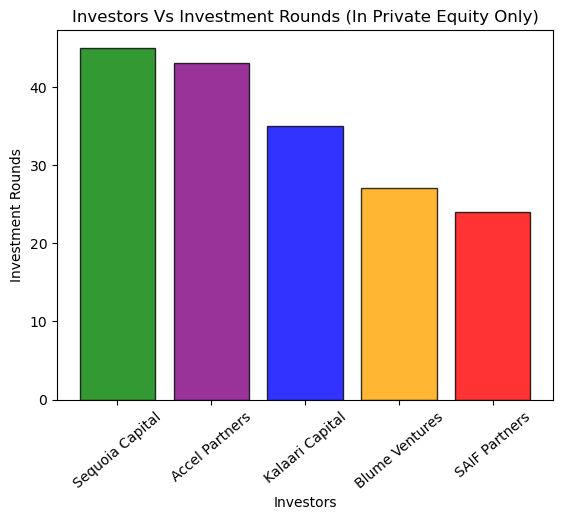

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()

df.dropna(subset=['InvestorsName', 'StartupName'], inplace=True)
df.drop(df.index[df.InvestorsName == 'Undisclosed Investors'], inplace=True)
df.drop(df.index[df.InvestorsName == 'Undisclosed investors'], inplace=True)
df.replace({'InvestmentType':{'PrivateEquity':'Private Equity', 'SeedFunding':'Seed Funding', 'Crowd funding':'Crowd Funding'}}, inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

investor_name = np.array(list(df.InvestorsName))
startups = np.array(list(df.StartupName))
in_type = np.array(list(df.InvestmentType))

ind = np.where(in_type=='Private Equity')
investor_name = investor_name[ind]
startups = startups[ind]

dct = {}
for i in range(len(investor_name)):
    name = investor_name[i].split(',')
    for n in name:
        if n != '':
            n = n.strip()
            if n in dct:
                dct[n].add(startups[i])
            else:
                dct[n] = {startups[i]}

for i in dct:
    dct[i] = len(dct[i])
    
investors = np.array(list(dct.keys()))
val = np.array(list(dct.values()))

ind = val.argsort()[::-1]
ind = ind[:5]

investors = investors[ind]
val = val[ind]

print('Top 5 Investors of Private Equity are - ')
for i in range(len(investors)):
    print(investors[i], "--", val[i])
    
color=['green', 'purple', 'blue', 'orange', 'red']
plt.bar(investors, val, color=color, alpha=0.8, edgecolor='black')
plt.title('Investors Vs Investment Rounds (In Private Equity Only)')
plt.xticks(rotation = 40)
plt.xlabel('Investors')
plt.ylabel('Investment Rounds')
plt.show()